# 군집화

## 기본 개념
군집화(clustering), 또는 군집 분석(cluster analysis)이란 주어진 객체들을 같은 그룹에 속한 객체들은 최대한 유사하도록(또는 관련이 있도록), 그리고 다른 그룹에 속한 속한 객체들은 최대한 유사하지 않도록(또는 관련이 없도록) 그룹화하는 절차이다.

## 활용
* 이해
    - 브라우징을 위해 연관된 문서들을 군집화한다.
    - 유사 기능을 갖는 유전자 혹은 단백질을 군집화한다.
    - 유사한 가격 변화를 보이는 주식들을 군집화한다.
* 요약
    - 넓은 지역의 강수량 분포를 군집화한다.
    
## 종류
* 분할 군집화(partitional clustering): 데이터 객체들을 원소가 겹치지 않는 부분 집합으로 나눈다. 비계층적 군집화라고도 부른다.
* 계층적 군집화(hierarchical clustering): 계층적 트리에 의해 구성되며 하위 군집을 상위 군집이 포함한다.

# 문서 군집

## 문서 군집이란?
문서 군집(document clustering)이란 다수의 문서로 구성된 문서 집합의 문서들을 속성이 유사한 문서들끼리 집단(군집)화하는 절차를 말한다. 이때 **문서의 속성**과 **문서의 유사성**을 어떻게 정의할지가 매우 중요하다. 문서의 속성에는 군집의 목표에 따라 문서의 길이 등 다양한 정보를 반영할 수 있는데 앞서 살펴본 어휘 벡터 모델을 이용하는 것이 보통이다. 문서의 유사성은 벡터 간의 유사도 측정에 의하여 판단한다. 물론 군집을 어떠한 방법으로 만들 것인가도 중요하며 군집은 몇 개까지 만드는 것이 적절한지도 판단을 필요로 한다.

문서 군집은 다양하게 응용될 수 있다. 다수의 개별 문서가 포함된 대규모 문서 집합의 속성을 파악하기 힘들 때에 문서 군집을 이용하면 주어진 문서 집합의 개략적인 속성을 요약적으로 이해할 수 있다. 또한 검색 엔진에서 검색 결과를 서비스 이용자에게 돌려줄 때에 비슷한 문서들끼리 묶어서 표시함으로써 검색 결과의 유용성을 증대시킬 수도 있다.

한편 기계 학습의 관점에서 볼 때에 문서 군집은 비지도 학습(unsupervised learning)이다. 학습 자료가 주어지지 않은 상태에서 결과를 얻기 때문이다. 이는 다음 강의에서 다룰 문서 분류(document classification)와 대비되는 것이다. 경우에 따라 문서 군집은 지도 학습(supervised learning)인 문서 분류의 사전 준비 작업을 위해 이용되기도 한다.

## 계층적 군집화
계층적 군집화(hierarchicnal clustering)는 개별 자료 항목 하나 하나를 클러스터로 설정한 다음 클러스터 간의 유사성을 판단하여 유사한 클러스터들끼리 합병 동작을 모든 클러스터들이 하나의 클러스로 합쳐질 때까지 반복 수행하는 상향식(bottom up) 방식의 군집 방식이다.

계층적 군집화에는 자료 간의 거리, 혹은 유사도를 측정하는 방법, 거리를 최적화하는 방법, 군집 간의 연결(linkage)을 만드는 방법 등에 따라 여러 가지 기법이 존재한다.

다음은 자료 항목간의 거리를 유클리드 거리로 정의하고 군집 간의 거리는 두 군집에 속한 속성들의 값이 평균으로부터 떨어진 정도인 편차 제곱을 모두 합하여 구하는 워드(ward) 기법을 사용하는 계층적 군집화의 사례이다.
군집 분석 대상 문서 집합은 노무현 전직 대통령의 연설문으로 구성하였다.
연설문은 총 780건이다.

In [1]:
# 소요리문답 자료를 군집화 한다

import sys
import ujson
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt


FEATURE_POSES = ["NNG", "NNP", "NR", "NP", "XR", "MAG", "VA", "VV"]
MA_KEYS = ["question_ma", "answer_ma"]


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            morphs = []
            json_obj = ujson.loads(line)

            for ma_key in MA_KEYS:
                for morph_lex, morph_cat in json_obj[ma_key]:
                    if morph_cat not in FEATURE_POSES:
                        continue
                        
                    morphs.append(morph_lex)

            document = " ".join(morphs)
            print(document)
            documents.append(document)

    return documents



def check_ma_keys(json_obj):
    """JSON 객체에 형태소 분석 키가 존재하는지 검사한다."""
    
    for ma_key in MA_KEYS:
        if ma_key not in json_obj or not json_obj[ma_key]:
            return False
        
    return True

def set_font():
    """차트의 글꼴을 설정한다."""
    
    if sys.platform in ["win32", "win64"]:
        font_name = "malgun gothic"
    elif sys.platform == "darwin":
        font_name = "AppleGothic"
        
    matplotlib.rc("font", family=font_name)
    

def read_president_fields(input_file_name):
    """주어진 이름의 파일에서 소요리문답 번호와 질문을 읽어서 돌려준다."""
    
    president_fields = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            json_obj = ujson.loads(line)
            president = json_obj["no"]
            aa = "[" + str(president) + "]"
            field = json_obj["question"]
            president_fields.append(aa + "-" + field)

    return president_fields


def build_doc_term_mat(documents):
    """주어진 문서 집합으로부터 문서-단어 행렬을 생성하여 돌려준다."""
    
    vectorizer = TfidfVectorizer(tokenizer=str.split)
    doc_term_mat = vectorizer.fit_transform(documents)

    return doc_term_mat


def get_hier_clusters(doc_term_mat):
    """주어진 문서-단어 행렬에 대하여 계층적 군집화를 수행하여 결과를 돌려준다."""
    
    clusters = linkage(doc_term_mat.toarray(), "ward")

    return clusters


def plot_linkage(output_file_name, clusters, president_fields):
    """덴드로그램을 주어진 이름의 출력 파일에 출력한다."""
    
    set_fonts()
    plt.figure(figsize=(40, 80))
    dendrogram(clusters, orientation="right", labels=president_fields,
               leaf_font_size=5)
    plt.savefig(output_file_name, dpi=200)
    # 덴드로그램을 화면에 직접 표시라면 아래의 주석을 해제한다.
    # plt.show()
    plt.close()
    
    
def set_fonts():
    """플랫폼에 따라 출력에 사용할 글꼴을 지정한다."""
    
    if sys.platform.startswith("win"):
        matplotlib.rc("font", family="Malgun Gothic")
    elif sys.platform.startswith("darwin"):
        matplotlib.rc("font", family="AppleGothic")

    
def main():
    """소요리문답 자료를 계층적 방법으로 군집화한다."""
    
    input_file_name = "data/catechism/catechism.ma.txt"
    output_file_name = "data/catechism/nmh_catechism.dendro.png"
    
    documents = read_documents(input_file_name)
    president_fields = read_president_fields(input_file_name)
    doc_term_mat = build_doc_term_mat(documents)
    clusters = get_hier_clusters(doc_term_mat)
    plot_linkage(output_file_name, clusters, president_fields)

    
#   
# 실행
#
main()

사람 제일 되 목적 무엇 사람 제일 되 목적 하나님 영화 하 영원 그 즐거워하
하나님 규칙 우리 어떻 자기 영화 하 즐거워하 지시 신구약 성경 기재 하나님 말씀 어떻 우리 그 영화 하 즐거워하 지시 유일한 규칙
성경 제일 요긴 교훈 무엇 성경 제일 요긴 교훈 사람 하나님 대하 어떻 믿 하나님 사람 요구 본분
하나님 하나님 이신 그 존재 지혜 권능 거룩 공의 인자 진실 무한 무궁 불변
하나님 하나님 참되 살 계시 하나님
하나님 신격 위 하나님 신격 삼위 계시 성부 성자 성령 이신 삼위 하나님
하나님 예정 무엇 하나님 예정 뜻대로 하 영원 경륜 이신 이 말미암 자기 영광 위하 되 일 미리 작정
하나님 예정 어떻 이루 하나님 예정 이루 창조 섭리 일 하
창조 일 무엇 창조 하나님 엿새 동안 없 권능 말씀 만물 다 매우 좋
하나님 사람 어떻 하나님 사람 남녀 자기 형상 지식 공의 거룩 있 지 으 사 생물 주관 하
하나님 섭리 일 무엇 하나님 섭리 지극히 거룩 지혜 권능 창조물 들 행동 보존 치
사람 창조 받 보 지위 있 때 하나님 저 향하 섭리 특별 작정 하 하나님 사람 창조 후 완전히 순 복 조건 삼 생명 언약 맺 선악 분별 나무 실과 먹 사망 벌 금하
우리 시조 창조 받 보 지위 그대로 우리 시조 임의 자유 인하 하나님 죄 범하 창조 받 보 지위 타락
죄 무엇 죄 하나님 법 순종 부족 혹 어기
우리 시조 창조 받 보 지위 타락 되 죄 무엇 우리 시조 창조 받 보 지위 타락 되 죄 금하 실과 먹
인종 아담 범죄 타락 아담 더불 언약 세우 저 위하 하 그 후 자손 위하 하 그 보통 생육 법 출생 인종 모두 그 안 있 그 범죄 참여 그 함께 타락
타락 인종 하여금 어떠 지위 이르 하 타락 인종 하여금 죄 비참 처지 이르 하
사람 타락 지위 죄 무엇 사람 타락 지위 죄 아담 범죄 유죄 근본 의 없 오 성품 부패 이것 보통 원죄 하 아울러 원죄 말미암 나오 죄
사람 타락 지위 비참 무엇 인종 타락 인하 하나님 교제 끊어지 그 진노 저주 아래 있 생전 비참 사망 영원 지옥 

## 비계층적 군집화
비계층적 군집화(non-hierarchicnal clustering)는 자료 항목들을 주어진 갯수의 군집들로 분할(partition)하는 군집화 방법으로 처리 속도가 빨라 많은 분야에서 사용하고 있다. 가장 널리 사용되는 기법은 K-평균(k-means)이다. 

K-평균 기법은 같은 군집에 속한 자료 항목들은 서로 거리가 "가깝다"라는 간단한 가정에서 시작한다. 각각의 군집에는 **중심(centroid)**을 하나씩 설정하고 이로부터 각각의 자료와의 거리는 비용(cost)으로 정의한다. 결국 K-평균은 이와 같이 정의한 비용을 최소화하는 군집을 찾는 알고리즘이다.

앞서 계층적 군집화의 대상이 된 대통령 연설문 집합을 대상으로 K-평균 군집화 실험을 해보자.

Initialization complete
Iteration 0, inertia 147.74765064861356
Iteration 1, inertia 82.03647440168363
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 144.82861561933598
Iteration 1, inertia 82.19682934648746
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 146.22646144678154
Iteration 1, inertia 82.31315271186882
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 147.3796308230367
Iteration 1, inertia 82.41248480781326
Iteration 2, inertia 82.28344418459513
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 148.07734556388934
Iteration 1, inertia 81.54459757261716
Iteration 2, inertia 81.27886934636007
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 146.41936615284422
Iteration 1, inertia 82.19311365185892
Converged at iteration 1: strict convergence.
Initialization complete
Itera

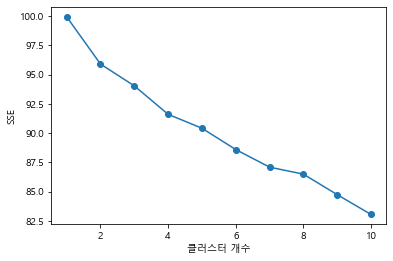



Prediction
Loaded kmeans model :: KMeans(n_clusters=11, verbose=1)
[1]


In [2]:
# 소요리문답 자료를 KMeans 군집화

import ujson
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sys
import matplotlib
import matplotlib.pyplot as plt
import collections
import pickle

FEATURE_POSES = ["NNG", "NNP", "NR", "NP", "XR", "MAG", "VA", "VV"]
MA_KEYS = ["question_ma", "answer_ma"]

NUM_CLUSTERS = 11


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []
    qna_documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            morphs = []
            json_obj = ujson.loads(line)

            for ma_key in MA_KEYS:
                for morph_lex, morph_cat in json_obj[ma_key]:
                    if morph_cat not in FEATURE_POSES:
                        continue
                        
                    morphs.append(morph_lex)

            document = " ".join(morphs)
            #print(document)
            documents.append(document)
            #print("문답[{}] 키워드 추출대상 단어[{}]".format(json_obj["no"], morphs))
            qna_document = json_obj["question"]
            qna_documents.append(qna_document)
            
    return documents, qna_documents


def build_doc_term_mat(documents):
    """주어진 문서 집합으로부터 문서-단어 행렬을 생성하여 돌려준다."""
    
    vectorizer = TfidfVectorizer(tokenizer=str.split)
    doc_term_mat = vectorizer.fit_transform(documents)
    words = vectorizer.get_feature_names()
    
    #store the vectorizer(TfidfVectorizer(tokenizer=str.split))
    with open("catechism_vectorizer.pkl", 'wb') as handle:
        pickle.dump(vectorizer, handle)
        
    return vectorizer, doc_term_mat, words


def get_flat_clusters(doc_term_mat, kmeans_pkl_filename):
    """주어진 문서-단어 행렬에 대하여 비계층적 군집화를 수행하여 모델을 돌려준다."""
    
    km = KMeans(n_clusters=NUM_CLUSTERS, init="k-means++", verbose=1)
    km.fit(doc_term_mat)
    
    # Open the file to save as pkl file
    kmeans_model_pkl = open(kmeans_pkl_filename, 'wb')
    pickle.dump(km, kmeans_model_pkl)
    # Close the pickle instances
    kmeans_model_pkl.close()
    
    return km


def print_centroid_words(model, words, qna_documents):
    """주어진 모델과 단어들을 이용하여 군집별 중심 단어를 출력한다."""
    
    print("군집별 중심 단어")
    print()

    ordered_centroids = model.cluster_centers_.argsort()[:, ::-1]
    #print("ordered_centroids=[{}]".format(ordered_centroids))
    clusters = collections.defaultdict(list)
    for i, label in enumerate(model.labels_):
        #print("문장번호=[{}],클러스터번호=[{}]".format(i,label))
        clusters[label].append(i)
    


    for cluster_num in range(NUM_CLUSTERS):
        center_word_nums = [word_num for word_num 
                            in ordered_centroids[cluster_num, :20]]
        #print("center_word_nums=[{}]".format(center_word_nums))
        center_words = [words[word_num] for word_num in center_word_nums]
        print("군집 키워드 {}: {}".format(cluster_num, ", ".join(center_words)))
        print()
        for i,sentence in enumerate(clusters[cluster_num]):
            print("\t문장  {} :문답번호=[{}]{}".format(i, sentence+1, qna_documents[sentence]))
        print("="*100)

def set_font():
    """차트의 글꼴을 설정한다."""
    
    if sys.platform in ["win32", "win64"]:
        font_name = "malgun gothic"
    elif sys.platform == "darwin":
        font_name = "AppleGothic"
        
    matplotlib.rc("font", family=font_name)

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    
    set_font()    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
def get_prediction_by_kmeans_model(sentence, vectorizer, kmeans_pkl_filename):
    """학습된 K-Means모델로부터 예측을 수행한다."""
    print("\n")
    print("Prediction")
    
    # Loading the saved KMeans clustering model pickle
    kmeans_model_pkl = open(kmeans_pkl_filename, 'rb')
    kmeans_model_model = pickle.load(kmeans_model_pkl)
    print("Loaded kmeans model :: {}".format(kmeans_model_model))

    Y = vectorizer.transform(sentence)
    prediction = kmeans_model_model.predict(Y)
    print(prediction)

def main():
    """소요리문답 자료를 비계층적 방법으로 군집화한다."""
    
    input_file_name = "data/catechism/catechism.ma.txt"
    clusters = collections.defaultdict(list)
    # Dump the trained KMeans clustering with Pickle
    kmeans_pkl_filename = 'kmeans_pkle_clustering_20171129.pkl'
    sentence = ["사람 의 제일 되는 목적 이 무엇 이 ㄴ가 ?"]
    #sentence = ["하나님 은 어떤 분 이 시 ㄴ가 ?"]


    documents, qna_documents = read_documents(input_file_name)
    vectorizer, doc_term_mat, words = build_doc_term_mat(documents)
    model = get_flat_clusters(doc_term_mat, kmeans_pkl_filename)
    print_centroid_words(model, words, qna_documents)
    elbow(doc_term_mat)
    get_prediction_by_kmeans_model(sentence, vectorizer, kmeans_pkl_filename)
        

# 실행
main()